In [30]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:

df=pd.read_csv("loans.csv")
df

,No,Credit History,Debt,Collatoral,Income,Risk
0,1,bad,high,no,< NOK 15K,high
1,2,unknown,high,no,NOK 15K – NOK 35K,high
2,3,unknown,low,no,NOK 15K – NOK 35K,medium
3,4,unknown,low,no,< NOK 15K,high
4,5,unknown,low,No,> NOK 35K,low
5,6,unknown,low,yes,> NOK 35K,low
6,7,bad,low,no,< NOK 15K,high
7,8,bad,low,yes,> NOK 35K,medium
8,9,good,low,no,> NOK 35K,low
9,10,good,high,yes,> NOK 35K,low


In [32]:

df["Credit History"]=df["Credit History"].map({"bad":"bad","unknown":"good","good":"good"})
df["Credit History"]

0      bad
1     good
2     good
3     good
4     good
5     good
6      bad
7      bad
8     good
9     good
10    good
11    good
12    good
13     bad
Name: Credit History, dtype: object

In [33]:
df["Income"]=df["Income"].map({"< NOK 15K":1,"NOK 15K – NOK 35K":2,"> NOK 35K":3})
df["Income"]

0     1
1     2
2     2
3     1
4     3
5     3
6     1
7     3
8     3
9     3
10    1
11    2
12    3
13    2
Name: Income, dtype: int64

In [34]:
df_latest=pd.get_dummies(data=df,columns=["Credit History"],drop_first=True)
df_latest

,No,Debt,Collatoral,Income,Risk,Credit History_good
0,1,high,no,1,high,False
1,2,high,no,2,high,True
2,3,low,no,2,medium,True
3,4,low,no,1,high,True
4,5,low,No,3,low,True
5,6,low,yes,3,low,True
6,7,low,no,1,high,False
7,8,low,yes,3,medium,False
8,9,low,no,3,low,True
9,10,high,yes,3,low,True


In [35]:
df_latest=pd.get_dummies(data=df_latest,columns=["Debt","Collatoral"],drop_first=True)
df_latest

,No,Income,Risk,Credit History_good,Debt_low,Collatoral_no,Collatoral_yes
0,1,1,high,False,False,True,False
1,2,2,high,True,False,True,False
2,3,2,medium,True,True,True,False
3,4,1,high,True,True,True,False
4,5,3,low,True,True,False,False
5,6,3,low,True,True,False,True
6,7,1,high,False,True,True,False
7,8,3,medium,False,True,False,True
8,9,3,low,True,True,True,False
9,10,3,low,True,False,False,True


In [36]:

df_latest.drop("No",axis=1,inplace=True)

In [37]:
df_latest

,Income,Risk,Credit History_good,Debt_low,Collatoral_no,Collatoral_yes
0,1,high,False,False,True,False
1,2,high,True,False,True,False
2,2,medium,True,True,True,False
3,1,high,True,True,True,False
4,3,low,True,True,False,False
5,3,low,True,True,False,True
6,1,high,False,True,True,False
7,3,medium,False,True,False,True
8,3,low,True,True,True,False
9,3,low,True,False,False,True


In [38]:

from sklearn.tree import DecisionTreeClassifier

In [39]:
dtree=DecisionTreeClassifier()

In [40]:
X=df_latest.drop("Risk",axis=1)
X

,Income,Credit History_good,Debt_low,Collatoral_no,Collatoral_yes
0,1,False,False,True,False
1,2,True,False,True,False
2,2,True,True,True,False
3,1,True,True,True,False
4,3,True,True,False,False
5,3,True,True,False,True
6,1,False,True,True,False
7,3,False,True,False,True
8,3,True,True,True,False
9,3,True,False,False,True


In [41]:
y=df["Risk"]
y

0       high
1       high
2     medium
3       high
4        low
5        low
6       high
7     medium
8        low
9        low
10      high
11    medium
12       low
13      high
Name: Risk, dtype: object

In [42]:
dtree.fit(X,y)
#Here we make algorithm to fit the data 

DecisionTreeClassifier()

In [43]:
from sklearn import tree

In [44]:
print(tree.export_text(dtree))

|--- feature_0 <= 2.50
|   |--- feature_0 <= 1.50
|   |   |--- class: high
|   |--- feature_0 >  1.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: high
|   |   |--- feature_1 >  0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- class: high
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- class: medium
|--- feature_0 >  2.50
|   |--- feature_1 <= 0.50
|   |   |--- class: medium
|   |--- feature_1 >  0.50
|   |   |--- class: low



In [45]:
X

,Income,Credit History_good,Debt_low,Collatoral_no,Collatoral_yes
0,1,False,False,True,False
1,2,True,False,True,False
2,2,True,True,True,False
3,1,True,True,True,False
4,3,True,True,False,False
5,3,True,True,False,True
6,1,False,True,True,False
7,3,False,True,False,True
8,3,True,True,True,False
9,3,True,False,False,True


In [46]:
df

,No,Credit History,Debt,Collatoral,Income,Risk
0,1,bad,high,no,1,high
1,2,good,high,no,2,high
2,3,good,low,no,2,medium
3,4,good,low,no,1,high
4,5,good,low,No,3,low
5,6,good,low,yes,3,low
6,7,bad,low,no,1,high
7,8,bad,low,yes,3,medium
8,9,good,low,no,3,low
9,10,good,high,yes,3,low


In [ ]:
counts=np.bincount(df_latest["Income"])
counts



array([0, 4, 4, 6])

In [48]:
len(df_latest["Income"]) 


14

In [49]:
counts/(len(df_latest["Income"]))


array([0.        , 0.28571429, 0.28571429, 0.42857143])

In [50]:
import math

In [51]:
def calc_entropy(column):
    counts=np.bincount(column) 
    probability=counts/(len(column))
    entropy=0
    for prob in probability: 
        if prob >0:
            entropy += prob * math.log(prob, 2) 
    return -entropy 
    

In [52]:
print(calc_entropy(df_latest["Income"]))
print(calc_entropy(df_latest["Credit History_good"]))
print(calc_entropy(df_latest["Debt_low"]))
print(calc_entropy(df_latest["Collatoral_no"]))
print(calc_entropy(df_latest["Collatoral_yes"]))

1.5566567074628228
0.863120568566631
1.0
0.863120568566631
0.74959525725948


In [53]:

df_latest["Risk"]=df_latest["Risk"].map({"low":1,"medium":2,"high":3})
df_latest["Risk"]

0     3
1     3
2     2
3     3
4     1
5     1
6     3
7     2
8     1
9     1
10    3
11    2
12    1
13    3
Name: Risk, dtype: int64

In [54]:
def information_gain(data, split,target):
    original_entropy=calc_entropy(data[target])
    values=data[split].unique()
    left_split=data[data[split]==values[0]]
    right_split=data[data[split]==values[1]]
    subract=0
    for subset in [left_split,right_split]:
        prob=(subset.shape[0])/data.shape[0]
        subract += prob * calc_entropy(subset[target])
    return  original_entropy - subract
    

In [55]:
print(information_gain(df_latest,"Income","Risk"))
print(information_gain(df_latest,"Credit History_good","Risk"))
print(information_gain(df_latest,"Debt_low","Risk"))
print(information_gain(df_latest,"Collatoral_no","Risk"))
print(information_gain(df_latest,"Collatoral_yes","Risk"))


1.2449047091342313
0.23777146126924031
0.06289889437401786
0.319574820392573
0.20604950908542197


In [56]:
print(tree.export_text(dtree))

|--- feature_0 <= 2.50
|   |--- feature_0 <= 1.50
|   |   |--- class: high
|   |--- feature_0 >  1.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: high
|   |   |--- feature_1 >  0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- class: high
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- class: medium
|--- feature_0 >  2.50
|   |--- feature_1 <= 0.50
|   |   |--- class: medium
|   |--- feature_1 >  0.50
|   |   |--- class: low



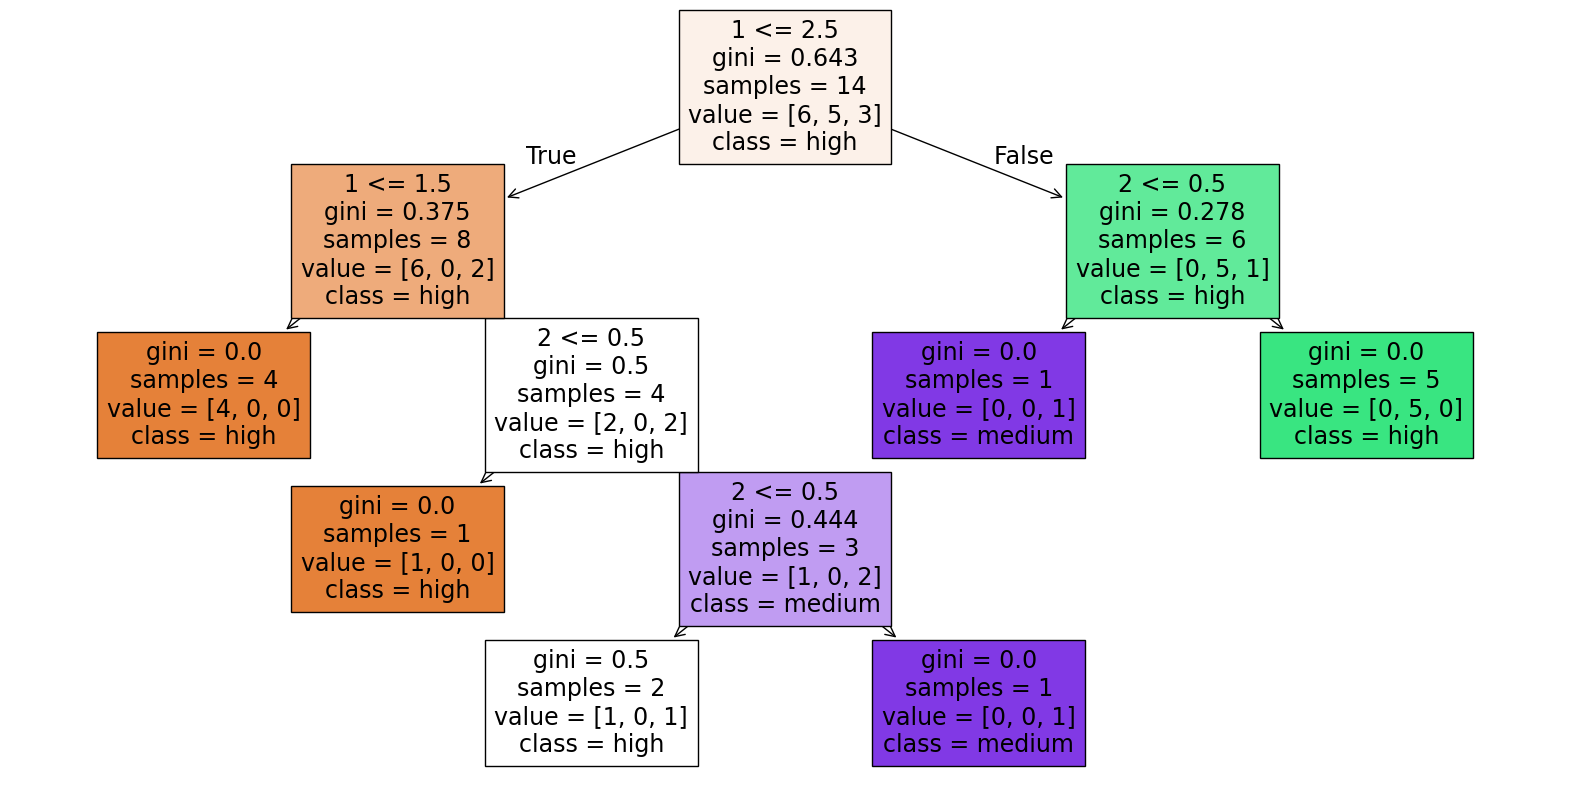

In [57]:
fig=plt.figure(figsize=(20,10))
_=tree.plot_tree(dtree,feature_names=df_latest["Income"],class_names=y,filled=True)